In [2]:
from collections import Counter
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt

data_path = Path('../data')

# load mat files
test = loadmat(data_path / 'test.mat')['data']
training_labels = loadmat(data_path / 'training_labels.mat')['data']
training = loadmat(data_path / 'training.mat')['data']

In [4]:
print('test shape:', test.shape)
print('training_labels shape:', training_labels.shape)
print('training shape:', training.shape)
print('training_labels:', Counter(training_labels[0, :]))

test shape: (5347, 32, 96)
training_labels shape: (1, 52890)
training shape: (52890, 32, 96)
training_labels: Counter({1: 27340, 0: 14530, 2: 4823, 3: 4412, 4: 1785})


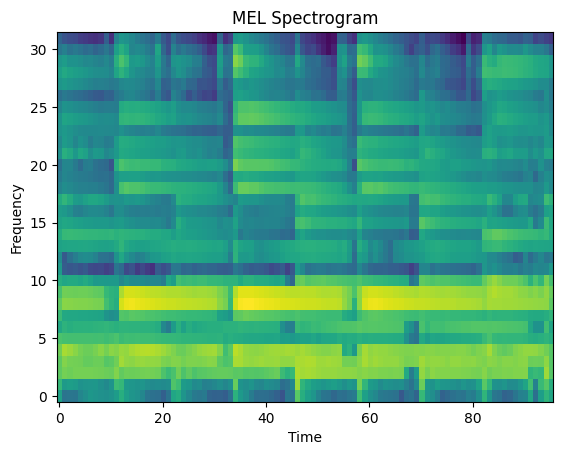

In [65]:
sample = training[0]
fig, ax = plt.subplots()

def plot_mel(mel, ax, title='MEL Spectrogram'):
    # visualize MEL spectrogram from training data sample with legend
    ax.imshow(mel, cmap='viridis', origin='lower', aspect='auto')
    ax.set(
        xlabel='Time',
        ylabel='Frequency',
        title=title,
    )
plot_mel(sample, ax)
plt.show()

# Augmentation

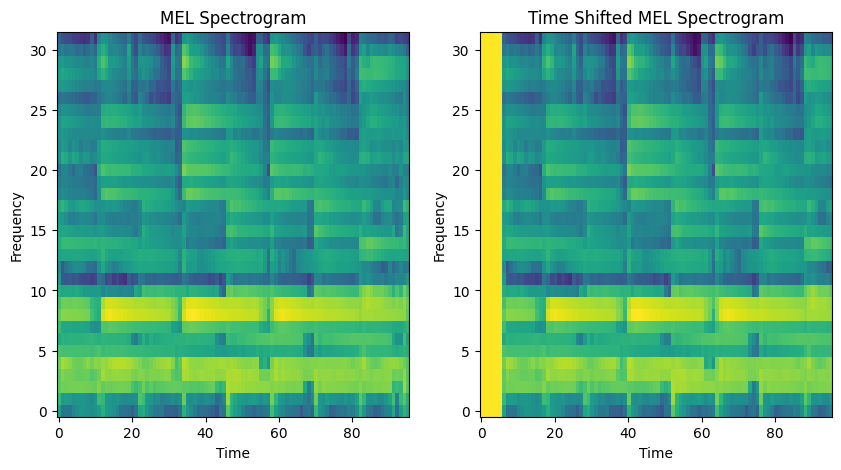

In [66]:
import augment

sample = training[0]

sample_time_shift = augment.time_shift(sample, shift_range=0.2)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_mel(sample, ax[0])
plot_mel(sample_time_shift, ax[1], title="Time Shifted MEL Spectrogram")
plt.show()


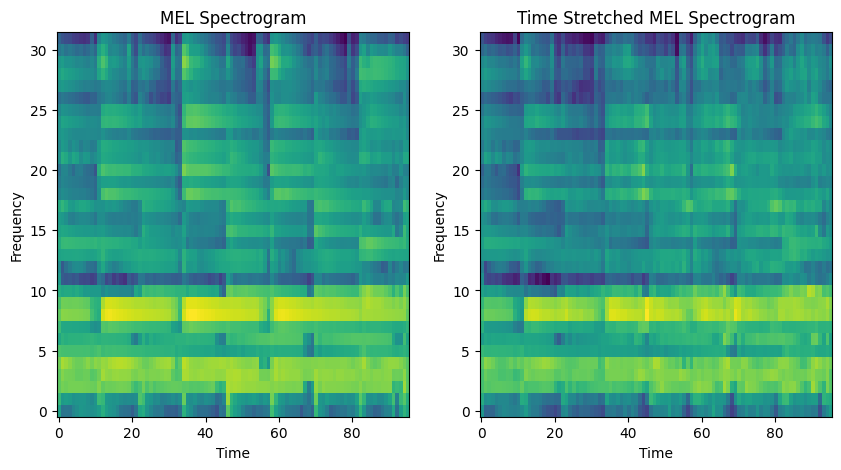

In [96]:
sample_time_stretch = augment.time_stretch(sample)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_mel(sample, ax[0])
plot_mel(sample_time_stretch, ax[1], title="Time Stretched MEL Spectrogram")
plt.show()

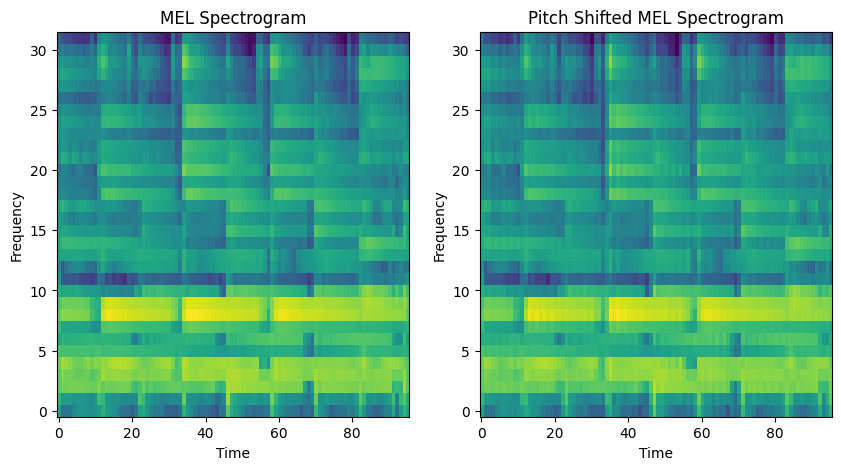

In [84]:
sample_pitch_shift = augment.pitch_shift(sample)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_mel(sample, ax[0])
plot_mel(sample_pitch_shift, ax[1], title="Pitch Shifted MEL Spectrogram")
plt.show()


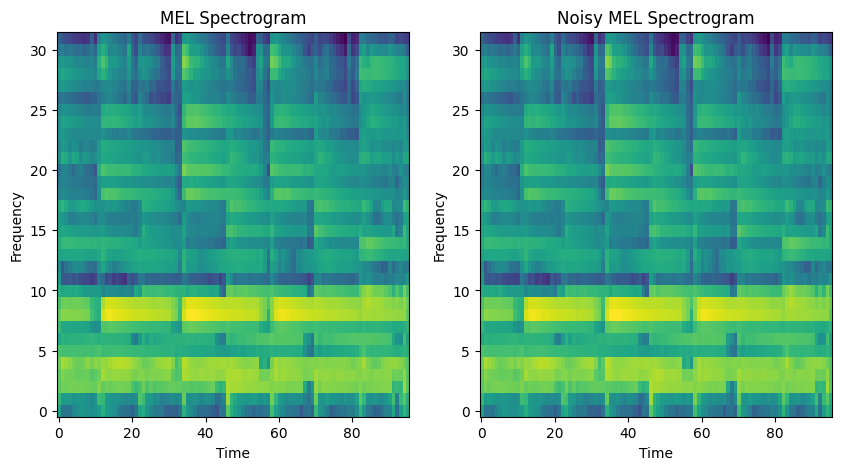

In [85]:
sample_noise = augment.add_noise(sample)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_mel(sample, ax[0])
plot_mel(sample_noise, ax[1], title="Noisy MEL Spectrogram")
plt.show()